In [345]:
import numpy as np
import pandas as pd 
from ase.io import read, write
from ase.units import Hartree,kcal,mol
kcalpmol = kcal/mol
import seaborn as sns
from ase import Atoms
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [442]:
def get_ae(dir_, func, skip = []):
    ae = -np.load(dir_+ "/{}_g2_ae.npy".format(func))
    return ae

atoms = read('../data/haunschild_g2/g2_97.traj',':')

openshell = [a.info['openshell'] for a in atoms]
closedshell = [not o for o in openshell]
ref = np.array([a.get_potential_energy()/Hartree for a in atoms])

# aes = {
# #        'PBE': get_ae('../exp/test_g2/','PBE'),
#        'PBE': get_ae('../exp/test_g2_large/','PBE'),
#        'BLYP': get_ae('../exp/test_g2/','BLYP'),
#        'PBEsol': get_ae('../exp/test_g2_large/','PBEsol'),
#        'RPBE': get_ae('../exp/test_g2/','RPBE'),
#        'GGA-HM':get_ae('../exp/test_g2/', 'GGA_HM'),
# #        'GGA-KSR (NN)':get_ae('../exp/old/test_g2_gga2/', 'GGA_2'),
# #        'GGA-KSR (NN radical)':get_ae('../exp/test_g2_large/', 'GGA_RADICAL'),
# #        'GGA-KSR (NN radical2)':get_ae('../exp/test_g2_large/', 'GGA_RADICAL2'),
# #        'GGA-KSR (NN radical3)':get_ae('../exp/test_g2_large/', 'GGA_RADICAL3'),
#        'GGA-KSR (NN)':get_ae('../exp/test_g2_large/', 'GGA_RADICAL_4'),
# #        'GGA-KSR (pol radical)':get_ae('../exp/test_g2_large/', 'GGA_RADICAL_POL_QUICK'),
#        'GGA-KSR (NN, barrier heights)':get_ae('../exp/test_g2_large/', 'GGA_REACTION'),
# #        'GGA-KSR (reaction2)':get_ae('../exp/test_g2_large/', 'GGA_REACTION2_QUICK'),
# #        'GGA-N12':get_ae('../exp/test_g2_large/', 'GGA_X_N12, GGA_C_N12'),
#        'GGA-KSR (pol.)': get_ae('../exp/test_g2/','GGA_POL'),
# #        'GGA-KSR (pol.,bh)': get_ae('../exp/test_g2/','GGA_POL_REACTION'),
# #        'GGA-KSR (pol., freec)': get_ae('../exp/test_g2/','GGA_POL_FREEC'),
# #        'GGA-KSR ( freec)': get_ae('../exp/test_g2/','GGA_FREEC_VAL'),
# #        'GGA-KSR (pol. reaction)': get_ae('../exp/test_g2_large/','GGA_POL_REACTION'),
# #        'SCAN':get_ae('../exp/test_g2_large/', 'SCAN'),
# #        'B97M-V':get_ae('../exp/test_g2_large/', 'MGGA_XC_B97M-V'),
# #        'M06-L':get_ae('../exp/test_g2_large/', 'M06-L'),
#        'MGGA-HM':get_ae('../exp/test_g2/', 'MGGA_HM'),
# #        'MGGA-KSR (NN)':get_ae('../exp/test_g2/', 'MGGA_1'),
# #        'MGGA-KSR (NN, freec)':get_ae('../exp/test_g2/', 'MGGA_FREEC'),
# #        'MGGA-KSR (pol)':get_ae('../exp/test_g2/', 'MGGA_POL'),
# #        'MGGA-KSR (NN,radical)':get_ae('../exp/test_g2_large/', 'MGGA_RADICAL'),
#        'MGGA-KSR (NN)':get_ae('../exp/test_g2_large/', 'MGGA_RADICAL2'),
# #        'MGGA-KSR (NN,reaction)':get_ae('../exp/test_g2_large/', 'MGGA_REACTION_QUICK'),
#        'MGGA-KSR (NN, barrier heights)':get_ae('../exp/test_g2_large/', 'MGGA_REACTION2_QUICK'),
#        'MGGA-KSR (pol)': get_ae('../exp/test_g2/','MGGA_POL'),
# #        'PBE0':get_ae('../exp/test_g2/', 'PBE0'),
# #        'B3LYP':get_ae('../exp/test_g2/', 'B3LYP'),
# #        'GGA-KSR0_1':get_ae('../exp/test_g2_large/', '0.25*HF + GGA_RADICAL0_1'),
# #        'GGA-KSR0_2':get_ae('../exp/test_g2_large/', '0.25*HF + GGA_RADICAL0_2'),
# #        'GGA-POL0':get_ae('../exp/test_g2/', '0.31741*HF + GGA_POL0'),
# #        '0.1 SCAN':get_ae('../exp/test_g2/', '0.1*HF + 0.9*MGGA_X_SCAN, MGGA_C_SCAN'),
# #        'MGGA0':get_ae('../exp/test_g2/', '0.11614*HF + MGGA_HYB_1'),
#        'CCSD(T)': ref}

aes = {
#        'PBE': get_ae('../exp/test_g2/','PBE'),
       'PBE': get_ae('../exp/test_g2_large/','PBE'),
       'BLYP': get_ae('../exp/test_g2/','BLYP'),
#        'PBEsol': get_ae('../exp/test_g2_large/','PBEsol'),
       'RPBE': get_ae('../exp/test_g2/','RPBE'),
#        'GGA-HM':get_ae('../exp/test_g2/', 'GGA_HM'),
#        'GGA-KSR (NN)':get_ae('../exp/old/test_g2_gga2/', 'GGA_2'),
#        'GGA-KSR (NN radical)':get_ae('../exp/test_g2_large/', 'GGA_RADICAL'),
#        'GGA-KSR (NN radical2)':get_ae('../exp/test_g2_large/', 'GGA_RADICAL2'),
#        'GGA-KSR (NN radical3)':get_ae('../exp/test_g2_large/', 'GGA_RADICAL3'),
       'GGA (NN)':get_ae('../exp/test_g2_large/', 'GGA_RADICAL_4'),
#        'GGA-KSR (pol radical)':get_ae('../exp/test_g2_large/', 'GGA_RADICAL_POL_QUICK'),
#        'GGA-KSR (NN, barrier heights)':get_ae('../exp/test_g2_large/', 'GGA_REACTION'),
#        'GGA-KSR (reaction2)':get_ae('../exp/test_g2_large/', 'GGA_REACTION2_QUICK'),
#        'GGA-N12':get_ae('../exp/test_g2_large/', 'GGA_X_N12, GGA_C_N12'),
       'GGA (pol)': get_ae('../exp/test_g2/','GGA_POL'),
#        'GGA-KSR (pol.,bh)': get_ae('../exp/test_g2/','GGA_POL_REACTION'),
#        'GGA-KSR (pol., freec)': get_ae('../exp/test_g2/','GGA_POL_FREEC'),
#        'GGA-KSR ( freec)': get_ae('../exp/test_g2/','GGA_FREEC_VAL'),
#        'GGA-KSR (pol. reaction)': get_ae('../exp/test_g2_large/','GGA_POL_REACTION'),
       'SCAN':get_ae('../exp/test_g2_large/', 'SCAN'),
#        'B97M-V':get_ae('../exp/test_g2_large/', 'MGGA_XC_B97M-V'),
#        'M06-L':get_ae('../exp/test_g2_large/', 'M06-L'),
#        'MGGA-HM':get_ae('../exp/test_g2/', 'MGGA_HM'),
#        'MGGA-KSR (NN)':get_ae('../exp/test_g2/', 'MGGA_1'),
#        'MGGA-KSR (NN, freec)':get_ae('../exp/test_g2/', 'MGGA_FREEC'),
#        'MGGA-KSR (pol)':get_ae('../exp/test_g2/', 'MGGA_POL'),
#        'MGGA-KSR (NN,radical)':get_ae('../exp/test_g2_large/', 'MGGA_RADICAL'),
#        'MGGA-KSR (NN)':get_ae('../exp/test_g2_large/', 'MGGA_RADICAL2'),
#        'MGGA-KSR (NN,reaction)':get_ae('../exp/test_g2_large/', 'MGGA_REACTION_QUICK'),
       'MGGA-KSR (NN, barrier heights)':get_ae('../exp/test_g2_large/', 'MGGA_REACTION2_QUICK'),
       'MGGA-KSR (pol)': get_ae('../exp/test_g2/','MGGA_POL'),
#        'PBE0':get_ae('../exp/test_g2/', 'PBE0'),
#        'B3LYP':get_ae('../exp/test_g2/', 'B3LYP'),
#        'GGA-KSR0_1':get_ae('../exp/test_g2_large/', '0.25*HF + GGA_RADICAL0_1'),
#        'GGA-KSR0_2':get_ae('../exp/test_g2_large/', '0.25*HF + GGA_RADICAL0_2'),
#        'GGA-POL0':get_ae('../exp/test_g2/', '0.31741*HF + GGA_POL0'),
#        '0.1 SCAN':get_ae('../exp/test_g2/', '0.1*HF + 0.9*MGGA_X_SCAN, MGGA_C_SCAN'),
#        'MGGA0':get_ae('../exp/test_g2/', '0.11614*HF + MGGA_HYB_1'),
       'CCSD(T)': ref}

# aes = {'PBE': get_ae('../exp/test_g2/','PBE'),
# #        'PBE-ML': get_ae('../exp/test_g2/','GGA_X_PBE_ML, GGA_C_PBE_ML'),
#        'BLYP': get_ae('../exp/test_g2/','BLYP'),
#        'RPBE': get_ae('../exp/test_g2/','RPBE'),
#        'GGA-HM':get_ae('../exp/test_g2/', 'GGA_HM'),
#        'GGA-KSR (NN)':get_ae('../exp/old/test_g2_gga2/', 'GGA_2'),
#        'GGA-KSR (NN free)':get_ae('../exp/test_g2/', 'GGA_FREE'),
#        'GGA-KSR (pol.)': get_ae('../exp/test_g2/','GGA_POL'),
#        'GGA-KSR (pol., freec)': get_ae('../exp/test_g2/','GGA_POL_FREEC'),
#        'GGA-TMP': get_ae('../exp/test_g2/','GGA_FREEC_VAL'),
#        'GGA-TMP-2': get_ae('../exp/test_g2/','GGA_FREEC_CHECK'),
#        'SCAN': get_ae('../exp/test_g2/','SCAN'),  
#        'MGGA-HM':get_ae('../exp/test_g2/', 'MGGA_HM'),
#        'MGGA-KSR (NN)':get_ae('../exp/test_g2/', 'MGGA_1'),
#        'MGGA-KSR (freec)':get_ae('../exp/test_g2/', 'MGGA_FREEC'),
# #        'M06-L': get_ae('../exp/test_g2/','M06-L'),
# #        'SCAN_ML': get_ae('../exp/test_g2_scan/','MGGA_X_SCAN_ML, MGGA_C_SCAN_ML'),
# #        'MGGA_TMP': get_ae('../exp/test_g2_mggatmp/','MGGA_TMP'),
# #        'GGA-KSR0': get_ae('/gpfs/home/smdick/smdick/test_g2_new/', '0.27274*HF + MGGA_HYB_TRIAL2_PBE0'),
# #        'GGA-KSR0_1': get_ae('../exp/old/test_g2_hybtmp1/', '0.25*HF + GGA_TMP0_1'),
# #        'GGA-KSR0_2': get_ae('../exp/old/test_g2_hybtmp2/', '0.25*HF + GGA_TMP0_2'),
# #        'GGA-KSR0_3': get_ae('../exp/old/test_g2_hybtmp3/', '0.25*HF + GGA_TMP0_3'),
# #        'GGA-KSR0': get_ae('../exp/old/test_g2_hybmix/', '0.25*HF + GGA_X_2, GGA_C_2'),
# #        'PBE0_ML': get_ae('../exp/test_g2_pbe0/','025*HF + 0.75*GGA_X_PBE_ML, GGA_C_PBE_ML'),
# #        'SCAN0_ML' : get_ae('../exp/test_g2_scan0/','0.25*HF + 0.75*MGGA_X_SCAN_ML, MGGA_C_SCAN_ML'),
#        'CCSD(T)': ref}


hm_train = [15, 58, 83]
# systems_train = [2, 113, 25, 18, 114, 0, 20, 26] #Training
systems_train = [2, 113, 25, 18, 114, 0, 20, 26, 108, 107] #Training
systems_train += [23, 84, 144, 21, 116, 106, 50, 15, 58] # Expanded training
systems_val = [103, 14, 23, 5, 10, 79, 27, 105] #Validation
skip = systems_train + systems_val + hm_train + [24] # 15 is outlier for SCAN
# skip += [i for i, a in enumerate(openshell) if not  a]
# skip =[]
filt = np.arange(len(ref))
filt = np.delete(filt, skip)
# filt = systems_train
# filt = [103, 14, 23, 5, 10, 79, 27, 105]
# filt = [2, 113, 18, 114, 0, 20, 26, 11, 101]
# filt  = [23, 84, 144, 21, 116, 106, 15, 58] 
aes = {key:val[filt] for key,val in aes.items()}

nelec = np.array([np.sum(a.get_atomic_numbers()) for a in atoms])

In [443]:
df_aes = pd.DataFrame(aes)*Hartree/kcalpmol
df_errors = -(df_aes.T - df_aes['CCSD(T)'].T).T
df_errors.abs().mean()
df_errors = df_errors.drop('CCSD(T)',axis=1)
df_errors = df_errors.reset_index()
df_errors = df_errors.melt('index',var_name= 'functional',value_name='Residuals (kcal/mol)').reset_index(drop='true')
ae_errors = pd.DataFrame(df_errors)

In [444]:
def get_facet(df,text_x=-0.1,xlim=None, error_col='Residuals (kcal/mol)'):
    sns.set_style("darkgrid", {"axes.facecolor": "None","grid.color":"None"})
    def label(x, color, label):
        ax = plt.gca()
        if label=='PBE':
            ax.text(0.27, .65, u'\u2190 Overbinding', fontweight="bold", color='black',alpha=0.5,
                ha="center", va="center", transform=ax.transAxes)
            ax.text(0.67, .65, u'Underbinding \u2192', fontweight="bold", color='black',alpha=0.5,
                ha="center", va="center", transform=ax.transAxes)
            ax.text(text_x, .65, 'XC\n(ME,MAE) \n(kcal/mol)'.format(x.mean(), x.abs().mean()), fontweight="bold", color='grey',
                ha="left", va="center", transform=ax.transAxes)
            
    #     ax.text(-0.1, .2, label, fontweight="bold", color="black",
    #             ha="left", va="center", transform=ax.transAxes)
        ax.text(text_x, .2, label +'\n({:.1f},{:.1f})'.format(x.mean(), x.abs().mean()), fontweight="bold", color=color,
                ha="left", va="center", transform=ax.transAxes)
    ridge_plot = sns.FacetGrid(df, row="functional", hue="functional", aspect=5, height=1.25)

    # Draw the densities in a few steps
    ridge_plot.map(plt.vlines, x=0,ymin=0,ymax=0.045, lw=1.5,ls='--',alpha=1, clip_on=False,color='black')
#     ridge_plot.map(sns.histplot, error_col,binrange=(0,0.004))
    ridge_plot.map(sns.kdeplot, error_col, clip_on=False, shade=True, alpha=0.7, lw=3, bw_method=.2)
    #g.map(sns.kdeplot, "co2_emission", clip_on=False, color="b", lw=4, bw=.2)
#     ridge_plot.map(plt.axvline, x=0, lw=3, clip_on=False)
    ridge_plot.map(plt.axhline, y=0, lw=3, clip_on=False)
#     ridge_plot.map(plt.axvline, x=0, lw=2,ls='--',alpha=0.5, clip_on=True,color='black')
    
    ridge_plot.map(label, error_col)
    # Set the subplots to overlap
    ridge_plot.fig.subplots_adjust(hspace=-0.5)
    # Remove axes details that don't play well with overlap
    ridge_plot.set_titles("")
    ridge_plot.set(yticks=[])
    #ridge_plot.set_xlabel("CO2 Emission",fontsize=30)
    ridge_plot.despine(bottom=True, left=True)
    return ridge_plot
# ridge_plot.fig.subplots_adjust(hspace=-.3)

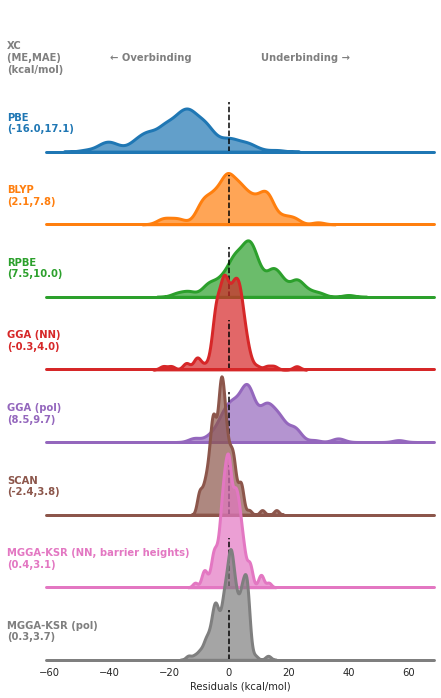

In [445]:
rp = get_facet(df_errors)
# rp.savefig('../figs/ae_gga.pdf')

In [403]:
# axhline(0, color='black',ls=':',zorder=-1)
# sns.violinplot(data=df_errors, x='functional', y='Residuals (kcal/mol)',)


In [404]:
# if skip:
#     rp.savefig('figs/AE_novaltrain.pdf',bbox_inches='tight')
#     rp.savefig('figs/AE_novaltrain.png',bbox_inches='tight')
# else:
#     rp.savefig('figs/AE.pdf',bbox_inches='tight')
#     rp.savefig('figs/AE.png',bbox_inches='tight')

In [405]:
def get_facet_rho(df,text_x=-0.1,xlim=None,error_col = 'Density error ($ \\times 10^3$)'):
    sns.set_style("darkgrid", {"axes.facecolor": "None","grid.color":"None"})
    def label(x, color, label):
        ax = plt.gca()
        if label=='PBE':
            ax.text(text_x, .65, 'XC\n(ME,RMSE)'.format(x.mean()), fontweight="bold", color='grey',
                ha="left", va="center", transform=ax.transAxes)
            
    #     ax.text(-0.1, .2, label, fontweight="bold", color="black",
    #             ha="left", va="center", transform=ax.transAxes)
        ax.text(text_x, .2, label +'\n({:.1f},{:.1f})'.format(x.mean(),(x**2).mean()**(1/2)), fontweight="bold", color=color,
                ha="left", va="center", transform=ax.transAxes)
        outliers = x[x>3.5]
        if len(outliers) < 3:
            outliers = x.sort_values().tail(3)
        xlims=ax.get_xlim()
        xrange = xlims[1]-xlims[0]
        heightdict={}
        for sym, x_ in outliers.items():
            xpos = (x_-xlims[0])/xrange
            xposr = np.round(x_/3)
            if not xposr in heightdict:
                heightdict[xposr] = 0.15
            else:
                heightdict[xposr] += 0.15
            ax.text(xpos, heightdict[xposr], sym, color='black',
                ha="center", va="center", transform=ax.transAxes)
#             ax.text(xpos, 0.1, sym, color='black',
#                 ha="center", va="center", transform=ax.transAxes)
    ridge_plot = sns.FacetGrid(df, row="functional", hue="functional", aspect=5, height=1.25)

    # Draw the densities in a few steps
    ridge_plot.map(plt.vlines, x=0,ymin=0,ymax=20, lw=2,ls='-',alpha=1, clip_on=False,color='black')
#     ridge_plot.map(sns.histplot, error_col,binrange=(0,4),binwidth=0.15)
    ridge_plot.map(sns.histplot, error_col,binwidth=0.15)
#     ridge_plot.map(sns.kdeplot, error_col, clip_on=False, shade=True, alpha=0.7, lw=3, bw_method=.2, clip= (0.0, .01))
    #g.map(sns.kdeplot, "co2_emission", clip_on=False, color="b", lw=4, bw=.2)
#     ridge_plot.map(plt.axvline, x=0, lw=3, clip_on=False)
    ridge_plot.map(plt.axhline, y=0, lw=3, clip_on=False)
#     ridge_plot.map(plt.axvline, x=0, lw=2,ls='--',alpha=1, clip_on=True,color='black')
    
    ridge_plot.map(label, error_col)
    # Set the subplots to overlap
    ridge_plot.fig.subplots_adjust(hspace=0.1)
    # Remove axes details that don't play well with overlap
    ridge_plot.set_titles("")
    ridge_plot.set(yticks=[])
    #ridge_plot.set_xlabel("CO2 Emission",fontsize=30)
    ridge_plot.despine(bottom=True, left=True)
    return ridge_plot
# ridge_plot.fig.subplots_adjust(hspace=-.3)

In [406]:

# dir_ = 'test_g2'
# erho = {'PBE': np.load('../exp/test_g2/PBE_errors_rho.npy'),
# #         'RPBE': np.load('../exp/test_g2/RPBE_errors_rho.npy'),
# #         'BLYP': np.load('../exp/test_g2/BLYP_errors_rho.npy'),
# #        'GGA-HM':np.load('../exp/test_g2/GGA_HM_errors_rho.npy'),
# #        'GGA-TMP': np.load('../exp/test_g2/GGA_TMP_2_errors_rho.npy'),
#         'GGA-POL': np.load('../exp/test_g2/GGA_POL_errors_rho.npy'),
#        'SCAN': np.load('../exp/test_g2/SCAN_errors_rho.npy'),
#        'MGGA-HM': np.load('../exp/test_g2/MGGA_HM_errors_rho.npy'),
#        'MGGA-1': np.load('../exp/test_g2/MGGA_1_errors_rho.npy'),
# #        'SCAN_ML': get_ae('../exp/test_g2_scan/','MGGA_X_SCAN_ML, MGGA_C_SCAN_ML'),
# #        'MGGA_TMP': get_ae('../exp/test_g2_mggatmp/','MGGA_TMP'),
#        'PBE0': np.load('../exp/test_g2/PBE0_errors_rho.npy'),
#        'B3LYP': np.load('../exp/test_g2/B3LYP_errors_rho.npy'),
# #        'SCAN0' : np.load('../exp/test_g2_scan0/S'),
# #        'PBE0_ML': get_ae('../exp/test_g2_pbe0/','025*HF + 0.75*GGA_X_PBE_ML, GGA_C_PBE_ML'),
# #        'SCAN0_ML' : get_ae('../exp/test_g2_scan0/','0.25*HF + 0.75*MGGA_X_SCAN_ML, MGGA_C_SCAN_ML'),
#        }

def get_ae(dir_, func, skip = []):
    ae = np.load(dir_+ "/{}_errors_rho.npy".format(func))
    return ae


erho = {
#       'PBE': get_ae('../exp/test_g2/','PBE'),
        'PBE': get_ae('../exp/test_g2_large/','PBE'),
#         'GGA-KSR (NN radical3)':get_ae('../exp/test_g2_large/', 'GGA_RADICAL3'),
        
#         'GGA-KSR (reaction2)':get_ae('../exp/test_g2_large/', 'GGA_REACTION2'),
#        'BLYP': get_ae('../exp/test_g2/','BLYP'),
       'BLYP': get_ae('../exp/test_g2_large/','BLYP'),
#        'PBEsol': get_ae('../exp/test_g2_large/','PBEsol'),
#        'RPBE': get_ae('../exp/test_g2/','RPBE'),
       'RPBE': get_ae('../exp/test_g2_large/','RPBE'),
#        'GGA-HM':get_ae('../exp/test_g2/', 'GGA_HM'),
       'GGA (NN)':get_ae('../exp/test_g2_large/', 'GGA_RADICAL_4'),
#        'GGA-KSR (NN, barrier heights)':get_ae('../exp/test_g2_large/', 'GGA_REACTION'),
#        'GGA-KSR (NN)':get_ae('../exp/old/test_g2_gga2/', 'GGA_2'),
#        'GGA-KSR (NN, radical)':get_ae('../exp/test_g2_large/', 'GGA_RADICAL'),
#        'GGA-KSR (NN radical2)':get_ae('../exp/test_g2_large/', 'GGA_RADICAL2'),
#        'GGA-KSR (NN radical3)':get_ae('../exp/test_g2_large/', 'GGA_RADICAL3'),
#        'GGA-N12':get_ae('../exp/test_g2_large/', 'GGA_X_N12, GGA_C_N12'),
       'GGA (pol)': get_ae('../exp/test_g2/','GGA_POL'),
#        'GGA-KSR (pol., freec)': get_ae('../exp/test_g2/','GGA_POL_FREEC'),
#        'SCAN':get_ae('../exp/test_g2_large/', 'SCAN'),
#        'B97M-V':get_ae('../exp/test_g2_large/', 'MGGA_XC_B97M-V'),
#        'M06-L':get_ae('../exp/test_g2_large/', 'M06-L'),
#        'MGGA-HM':get_ae('../exp/test_g2/', 'MGGA_HM'),
#        'MGGA-KSR (NN)':get_ae('../exp/test_g2/', 'MGGA_1'),
#        'MGGA-KSR (NN, freec)':get_ae('../exp/test_g2/', 'MGGA_FREEC'),
#        'MGGA-KSR (NN,radical)':get_ae('../exp/test_g2_large/', 'MGGA_RADICAL'),
#        'MGGA-KSR (NN)':get_ae('../exp/test_g2_large/', 'MGGA_RADICAL2'),
#        'MGGA-KSR (reaction)':get_ae('../exp/test_g2_large/', 'MGGA_REACTION_QUICK'),
#        'MGGA-KSR (NN, barrier heights)':get_ae('../exp/test_g2_large/', 'MGGA_REACTION2_QUICK'),
#        'MGGA-KSR (pol)': get_ae('../exp/test_g2/','MGGA_POL')

       }

# erho = {'PBE': get_ae('../exp/test_g2/','PBE'),
#        'BLYP': get_ae('../exp/test_g2/','BLYP'),
#        'RPBE': get_ae('../exp/test_g2/','RPBE'),
#        'GGA-HM':get_ae('../exp/test_g2/', 'GGA_HM'),
#        'GGA-KSR (NN)':get_ae('../exp/old/test_g2_gga2/', 'GGA_2'),
#        'GGA-KSR (NN free)':get_ae('../exp/test_g2/', 'GGA_FREE'),
#        'GGA-KSR (NN freec)':get_ae('../exp/test_g2/', 'GGA_FREEC_2'),
#        'GGA-KSR (pol.)': get_ae('../exp/test_g2/','GGA_POL'),
#        'GGA-KSR (pol. freec)': get_ae('../exp/test_g2/','GGA_POL_FREEC'),
#        'SCAN': get_ae('../exp/test_g2/','SCAN'),  
#        'MGGA-HM':get_ae('../exp/test_g2/', 'MGGA_HM'),
#        'MGGA-KSR (NN)':get_ae('../exp/test_g2/', 'MGGA_1'),
#        'MGGA-KSR (NN, freec)':get_ae('../exp/test_g2/', 'MGGA_FREEC'),
#        'PBE0':get_ae('../exp/test_g2/', 'PBE0'),
#        'B3LYP':get_ae('../exp/test_g2/', 'B3LYP'),
#        }

erho = {key:val[filt] for key,val in erho.items() }




In [407]:
df_erho = pd.DataFrame(erho)
df_errors = pd.DataFrame(erho)*1000
df_errors.index = [str(a.symbols) for idx,a in enumerate(atoms) if not idx in skip]
df_errors = df_errors.reset_index()
df_errors = df_errors.melt('index',var_name= 'functional',value_name='Density error ($ \\times 10^3$)').reset_index(drop='true')
rho_errors = pd.DataFrame(df_errors)

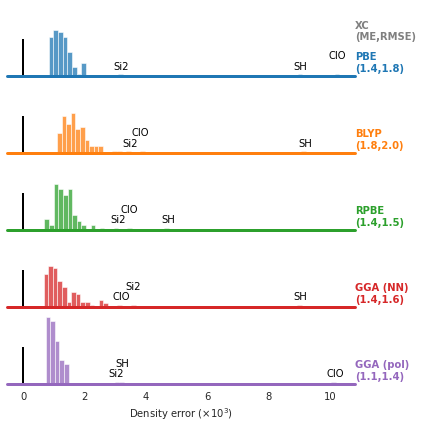

In [408]:

rp=get_facet_rho(df_errors.set_index('index'),text_x=1)
# rp.savefig('../figs/closedshell.png')

In [409]:
# if skip:
#     rp.savefig('figs/rhotot_novaltrain.pdf',bbox_inches='tight')
#     rp.savefig('figs/rhotot_novaltrain.png',bbox_inches='tight')
# else:
#     rp.savefig('figs/rhotot.pdf',bbox_inches='tight')
#     rp.savefig('figs/rhotot.png',bbox_inches='tight')

In [411]:
# hm = np.load('./test_bh76/MGGA_trial6_bh76.npy')
# pred = -np.load('./test_bh76/')
# pbe = -np.load('test_g2/PBE_g2_ae.npy')
# blyp =  -np.load('test_g2/BLYP_g2_ae.npy')
# bayesian = -np.load('test_g2/GGA_X_BAYESIAN, GGA_C_PBE_g2_ae.npy')
# rpbe = -np.load('test_g2/GGA_X_RPBE, GGA_C_PBE_g2_ae.npy')
# pbe0 = -np.load('test_g2/PBE0_g2_ae.npy')
# b3lyp = -np.load('test_g2/B3LYP_g2_ae.npy')
# # scan = -np.load('test_g2/SCAN_g2_ae.npy')
# ref = np.array([a.get_potential_energy()/Hartree for a in read('../haunschild_g2/g2_97.traj',':')])

# np.load('./test_bh76/.npynpy')

def get_ae(dir_, func, skip = []):
    ae = np.load(dir_+ "/{}_bh76.npy".format(func))
    return ae

aes = {'PBE': get_ae('../exp/test_bh/','PBE'),
       'BLYP': get_ae('../exp/test_bh/','BLYP'),
       'RPBE': get_ae('../exp/test_bh/','RPBE'),
#        'GGA-HM':get_ae('../exp/test_bh/', 'GGA_HM'),
       'GGA (NN)':get_ae('../exp/test_bh_large/', 'GGA_RADICAL_4'),
#        'GGA-KSR (NN, barrier heights)': get_ae('../exp/test_bh_large/','GGA_REACTION'),
       'GGA (pol)': get_ae('../exp/test_bh/','GGA_POL'),
#        'SCAN':get_ae('../exp/test_bh/', 'SCAN'),
#        'B97M-V':get_ae('../exp/test_bh_large/', 'MGGA_XC_B97M-V'),
#        'MGGA-HM':get_ae('../exp/test_bh/', 'GGA_HM'),
#        'MGGA-KSR (NN)':get_ae('../exp/test_bh_large/', 'MGGA_RADICAL2'),
#        'MGGA-KSR (NN, barrier heights)':get_ae('../exp/test_bh_large/', 'MGGA_REACTION2'),
#        'MGGA-KSR (pol)':get_ae('../exp/test_bh/', 'MGGA_POL')
     }

# aes = {
# #        'PBE': get_ae('../exp/test_g2/','PBE'),
#        'PBE': get_ae('../exp/test_g2_large/','PBE'),
#        'BLYP': get_ae('../exp/test_g2/','BLYP'),
# #        'PBEsol': get_ae('../exp/test_g2_large/','PBEsol'),
#        'RPBE': get_ae('../exp/test_g2/','RPBE'),
#        'GGA-HM':get_ae('../exp/test_g2/', 'GGA_HM'),
#        'GGA-KSR (NN)':get_ae('../exp/old/test_g2_gga2/', 'GGA_2'),
# #        'GGA-KSR (NN radical)':get_ae('../exp/test_g2_large/', 'GGA_RADICAL'),
# #        'GGA-KSR (NN radical2)':get_ae('../exp/test_g2_large/', 'GGA_RADICAL2'),
# #        'GGA-KSR (NN radical3)':get_ae('../exp/test_g2_large/', 'GGA_RADICAL3'),
#        'GGA-KSR (NN)':get_ae('../exp/test_g2_large/', 'GGA_RADICAL_4'),
# #        'GGA-KSR (pol radical)':get_ae('../exp/test_g2_large/', 'GGA_RADICAL_POL_QUICK'),
#        'GGA-KSR (NN, barrier heights)':get_ae('../exp/test_g2_large/', 'GGA_REACTION'),
# #        'GGA-KSR (reaction2)':get_ae('../exp/test_g2_large/', 'GGA_REACTION2_QUICK'),
# #        'GGA-N12':get_ae('../exp/test_g2_large/', 'GGA_X_N12, GGA_C_N12'),
#        'GGA-KSR (pol.)': get_ae('../exp/test_g2/','GGA_POL'),
# #        'GGA-KSR (pol., freec)': get_ae('../exp/test_g2/','GGA_POL_FREEC'),
# #        'GGA-KSR ( freec)': get_ae('../exp/test_g2/','GGA_FREEC_VAL'),
# #        'GGA-KSR (pol. reaction)': get_ae('../exp/test_g2_large/','GGA_POL_REACTION'),
#        'SCAN':get_ae('../exp/test_g2_large/', 'SCAN'),
#        'B97M-V':get_ae('../exp/test_g2_large/', 'MGGA_XC_B97M-V'),
#        'MGGA-HM':get_ae('../exp/test_g2/', 'MGGA_HM'),
# #        'MGGA-KSR (NN)':get_ae('../exp/test_g2/', 'MGGA_1'),
# #        'MGGA-KSR (NN, freec)':get_ae('../exp/test_g2/', 'MGGA_FREEC'),
# #        'MGGA-KSR (pol)':get_ae('../exp/test_g2/', 'MGGA_POL'),
# #        'MGGA-KSR (NN,radical)':get_ae('../exp/test_g2_large/', 'MGGA_RADICAL'),
#        'MGGA-KSR (NN)':get_ae('../exp/test_g2_large/', 'MGGA_RADICAL2'),
# #        'MGGA-KSR (NN,reaction)':get_ae('../exp/test_g2_large/', 'MGGA_REACTION_QUICK'),
#        'MGGA-KSR (NN, barrier heights)':get_ae('../exp/test_g2_large/', 'MGGA_REACTION2_QUICK'),
#        'PBE0':get_ae('../exp/test_g2/', 'PBE0'),
#        'B3LYP':get_ae('../exp/test_g2/', 'B3LYP'),
# #        'GGA-KSR0_1':get_ae('../exp/test_g2_large/', '0.25*HF + GGA_RADICAL0_1'),
# #        'GGA-KSR0_2':get_ae('../exp/test_g2_large/', '0.25*HF + GGA_RADICAL0_2'),
#        'GGA-POL0':get_ae('../exp/test_g2/', '0.31741*HF + GGA_POL0'),
# #        '0.1 SCAN':get_ae('../exp/test_g2/', '0.1*HF + 0.9*MGGA_X_SCAN, MGGA_C_SCAN'),
# #        'MGGA0':get_ae('../exp/test_g2/', '0.11614*HF + MGGA_HYB_1'),
#        'CCSD(T)': ref}
# aes['CCSD(T)'] = np.load('../exp/test_bh/bh76.npy')*kcalpmol/Hartree
aes['CCSD(T)'] = np.load('../exp/test_bh/bh76.npy')
# skip = [15, 58, 83, 2, 25, 113, 18]
skip = [1, 57, 9]
# skip =[]
filt = np.arange(len(aes['CCSD(T)']))
filt = np.delete(filt, skip)
# filt = [1, 57, 9]
aes = {key:val[filt] for key,val in aes.items()}
# aes = {'PBE':pbe,'CCSD(T)':ref}
# atoms = read('../data/haunschild_g2/g2_97.traj',':')

# nelec = np.array([np.sum(a.get_atomic_numbers()) for a in atoms])

df_aes = pd.DataFrame(aes)
df_errors = -(df_aes.T - df_aes['CCSD(T)'].T).T
df_errors.abs().mean()
df_errors = df_errors.drop('CCSD(T)',axis=1)
df_errors = df_errors.reset_index()
df_errors = df_errors.melt('index',var_name= 'functional',value_name='Residuals (kcal/mol)').reset_index(drop='true')
bh_errors = pd.DataFrame(df_errors)

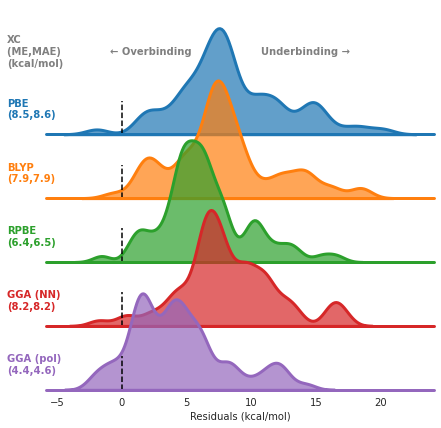

In [412]:
rp = get_facet(df_errors)

In [427]:
# rp.savefig('../figs/BH.pdf',bbox_inches='tight')
# rp.savefig('../figs/BH.png',bbox_inches='tight')

In [428]:
ae_errors['AE (MAE)'] = ae_errors['Residuals (kcal/mol)'].abs()
ae_errors['AE (ME)'] = ae_errors['Residuals (kcal/mol)']
rho_errors['Density'] = rho_errors['Density error ($ \\times 10^3$)'].abs()
bh_errors['BH (MAE)'] = bh_errors['Residuals (kcal/mol)'].abs()
bh_errors['BH (ME)'] = bh_errors['Residuals (kcal/mol)']

In [429]:
bh_mae = bh_errors.groupby('functional').mean()[['BH (MAE)','BH (ME)']]
rho_mae = rho_errors.groupby('functional').mean()[['Density']]
ae_mae = ae_errors.groupby('functional').mean()[['AE (MAE)', 'AE (ME)']]

In [430]:
errors = rho_mae.join(bh_mae, how='outer').join(ae_mae,how='outer')

In [431]:
errors = errors.loc[erho.keys()][['AE (ME)','AE (MAE)','Density','BH (ME)', 'BH (MAE)']]

In [432]:
errors = errors.loc[erho.keys()][['AE (MAE)','Density', 'BH (MAE)']]

In [433]:
errors = errors.round(1)

In [434]:
print(errors.fillna('').to_latex())

\begin{tabular}{lrrr}
\toprule
{} &  AE (MAE) &  Density &  BH (MAE) \\
functional &           &          &           \\
\midrule
PBE        &      17.1 &      1.4 &       8.6 \\
BLYP       &       7.8 &      1.8 &       7.9 \\
RPBE       &      10.0 &      1.4 &       6.5 \\
GGA (NN)   &       4.0 &      1.4 &       8.2 \\
GGA (pol)  &       9.7 &      1.1 &       4.6 \\
\bottomrule
\end{tabular}



In [435]:
from glob import glob
ip_atoms = read('../data/ip_atoms.traj',':')
ip_ref = np.array([a.info['ip'] for a in ip_atoms])
ea_ref = np.array([a.info['ea'] for a in ip_atoms])

In [446]:
ips = {}
eas = {}

for res in glob('../exp/test_ip/*ip.npy'):
    sim = np.load(res)*Hartree/kcalpmol
    name = res.split('/')[-1][:-7]
    ips[name] = sim - ip_ref
    
# for res in glob('../exp/test_ip/*ea.npy'):
#     sim = np.load(res)*Hartree/kcalpmol
#     name = res.split('/')[-1][:-7]
#     eas[name] = sim - ea_ref

ips = pd.DataFrame(ips).abs().mean().to_frame().rename({0:'IP'},axis=1)
# eas = pd.DataFrame(eas).abs().mean().to_frame().rename({0:'EA'},axis=1)
# ips['EA'] = eas['EA']
ips = ips.rename({'GGA_RADICAL_4':'GGA (NN)','GGA_REACTION':'GGA (NN, barrier heights)','GGA_POL':'GGA (pol)','MGGA_RADICAL2':'MGGA-KSR (NN)',
                 'MGGA_REACTION2':'MGGA-KSR (NN, barrier heights)'})

In [447]:
ips

,IP
M06-L,3.792607
BLYP,5.051985
MGGA_POL,3.075638
MGGA-KSR (NN),7.529240
RPBE,3.617944
GGA (NN),7.560103
PBE,4.142077
GGA (pol),4.021364
SCAN,5.646054
"MGGA-KSR (NN, barrier heights)",3.594190


In [448]:
atoms = read('../data/s22.traj',':')

s22_ref = np.array([a.info['e_binding'] for a in atoms])


In [449]:
s22 = {}
for res in glob('../exp/test_s22_small/*s22.npy'):
    sim = np.load(res)*Hartree/kcalpmol
    name = res.split('/')[-1][:-8]
    s22[name] = sim - s22_ref
    
s22 = pd.DataFrame(s22).abs().mean().to_frame().rename({0:'S22'},axis=1)
s22 = s22.rename({'GGA_RADICAL_4':'GGA (NN)','GGA_REACTION':'GGA-KSR (NN, barrier heights)','GGA_POL':'GGA (pol)','MGGA_RADICAL2':'MGGA-KSR (NN)',
                 'MGGA_REACTION2':'MGGA-KSR (NN, barrier heights)'})



In [450]:
s22

,S22
GGA (NN),4.037935
PBEsol,1.840025
"MGGA-KSR (NN, barrier heights)",2.599122
PBE,2.704181
RPBE,5.097649
GGA (pol),7.422966
BLYP,4.980510


In [440]:
errors.join(ips).join(s22).round(1).fillna('')

,AE (MAE),Density,BH (MAE),IP,S22
functional,,,,,
PBE,17.1,1.4,8.6,4.1,2.7
BLYP,7.8,1.8,7.9,5.1,5.0
RPBE,10.0,1.4,6.5,3.6,5.1
GGA (NN),4.0,1.4,8.2,7.6,4.0
GGA (pol),9.7,1.1,4.6,4.0,7.4


In [441]:
print(errors.join(ips).join(s22).round(1).fillna('').to_latex())

\begin{tabular}{lrrrrr}
\toprule
{} &  AE (MAE) &  Density &  BH (MAE) &   IP &  S22 \\
functional &           &          &           &      &      \\
\midrule
PBE        &      17.1 &      1.4 &       8.6 &  4.1 &  2.7 \\
BLYP       &       7.8 &      1.8 &       7.9 &  5.1 &  5.0 \\
RPBE       &      10.0 &      1.4 &       6.5 &  3.6 &  5.1 \\
GGA (NN)   &       4.0 &      1.4 &       8.2 &  7.6 &  4.0 \\
GGA (pol)  &       9.7 &      1.1 &       4.6 &  4.0 &  7.4 \\
\bottomrule
\end{tabular}

